In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
##### Load the libraries 

In [2]:
import pandas as pd
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns

### Load the dataset

In [3]:
print(pd.get_option("display.max_columns"))
pd.set_option("display.max_columns", 50)

ip_df = pd.read_csv("hurricane_hurvy.csv")
ip_df.head(2)

20


,fulcrum_id,project,latitude,longitude,name_of_surveyor,date_of_survey,type_of_disaster,general_notes,photos,photos_caption,photos_url,overall_building_condition,damage_indicator,dod,building_address_sub_thoroughfare,building_address_thoroughfare,building_address_suite,building_address_locality,building_address_sub_admin_area,building_address_admin_area,building_address_postal_code,building_address_country,building_address_full,assessment_type,year_built,...,roof_sheathing_nail_size,roof_sheathing_nail_size_other,roof_to_wall_connection,roof_to_wall_connection_other,opening_protection,opening_protection_other,garage_door,garage_door_location,garage_door_failure,other_structural_details,damage_modes,damage_modes_other,roof_cover_dmg,roof_sheathing_dmg,roof_structure_dmg,wall_cover_dmg,wall_sheathing_dmg,wall_structure_dmg,windows_dmg,doors_dmg,damage_description,water_height_inches,qc_id,qc_code,qc_notes
0,12d068d3-5948-4d6f-9204-e04942773081,CMMI-1759996,28.011980,-97.066175,David Roueche,8/28/2017,Hurricane,NaN,"c8b2053a-ea9e-4805-9d33-0c792473a7fd,942023a9-...",",,,,,,",https://web.fulcrumapp.com/photos/view?photos=...,1,2.0,2.0,912,S Verne st,NaN,Rockport,Aransas County,Texas,78382.0,United States,"912 S Verne st, Rockport, Texas 78382",Single Family Residence,2015.0,...,Unknown,NaN,Unknown,NaN,None,NaN,yes,Northwest,No,2006 IRC Intl Residential Code; Inland I; Expo...,Wind,NaN,10%,0%,0%,10%,0%,0%,0%,0%,NaN,NaN,Brett Davis,2a,NaN
1,e2a0e034-1857-4a35-a94a-ef7e4e8b7a75,CMMI-1759996,28.011826,-97.066229,David Roueche,8/28/2017,Hurricane,NaN,"1ed0c36d-778c-47a6-88e7-1800ca04f1d5,1dfdf84b-...",",,,,new building",https://web.fulcrumapp.com/photos/view?photos=...,2,2.0,4.0,916,S Verne St,NaN,Rockport,Aransas County,Texas,78382.0,United States,"916 S Verne St , Rockport, Texas 78382",Single Family Residence,2014.0,...,Unknown,NaN,Unknown,NaN,None,NaN,no,NaN,NaN,Inland,Wind,NaN,30%,30%,0%,0%,0%,0%,20%,0%,NaN,NaN,Kelly Turner,2a,NaN


In [ ]:
### Data validation, 
### Verifying size 

In [4]:
ip_df.shape

(1177, 63)

#### Verify the data type of each column

In [9]:
ip_df.info(verbose=True)
# ip_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 63 columns):
fulcrum_id                           1177 non-null object
project                              1177 non-null object
latitude                             1177 non-null float64
longitude                            1177 non-null float64
name_of_surveyor                     1177 non-null object
date_of_survey                       1177 non-null object
type_of_disaster                     1177 non-null object
general_notes                        90 non-null object
photos                               1176 non-null object
photos_caption                       1147 non-null object
photos_url                           1176 non-null object
overall_building_condition           1177 non-null int64
damage_indicator                     1149 non-null float64
dod                                  1145 non-null float64
building_address_sub_thoroughfare    1174 non-null object
building_address_thoro

#### Check NULL/NA value of each column

In [10]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 63 columns):
fulcrum_id                           1177 non-null object
project                              1177 non-null object
latitude                             1177 non-null float64
longitude                            1177 non-null float64
name_of_surveyor                     1177 non-null object
date_of_survey                       1177 non-null object
type_of_disaster                     1177 non-null object
general_notes                        90 non-null object
photos                               1176 non-null object
photos_caption                       1147 non-null object
photos_url                           1176 non-null object
overall_building_condition           1177 non-null int64
damage_indicator                     1149 non-null float64
dod                                  1145 non-null float64
building_address_sub_thoroughfare    1174 non-null object
building_address_thoro

#### Describe String and number types

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#### Describe the Object varibale
ip_df.describe(include=[object])  


,fulcrum_id,project,name_of_surveyor,date_of_survey,type_of_disaster,general_notes,photos,photos_caption,photos_url,building_address_sub_thoroughfare,building_address_thoroughfare,building_address_suite,building_address_locality,building_address_sub_admin_area,building_address_admin_area,building_address_country,building_address_full,assessment_type,roof_shape,roof_shape_other,roof_cover,roof_cover_other,wall_cladding,wall_cladding_other,other_details,structural_framing_system,structural_framing_system_other,roof_sheathing_nail_spacing,roof_sheathing_nail_size,roof_to_wall_connection,roof_to_wall_connection_other,opening_protection,opening_protection_other,garage_door,garage_door_location,garage_door_failure,other_structural_details,damage_modes,damage_modes_other,roof_cover_dmg,roof_sheathing_dmg,roof_structure_dmg,wall_cover_dmg,wall_sheathing_dmg,wall_structure_dmg,windows_dmg,doors_dmg,damage_description,qc_id,qc_code,qc_notes
count,1177,1177,1177,1177,1177,90,1176,1147,1176,1174,1176,1,1176,1176,1177,1177,1176,1177,1172,3,1097,68,1157,5,233,1116,4,1177,1177,1177,2,1056,5,1140,828,830,746,1114,1,1173,1174,1174,1173,1173,1173,1164,1158,220,1177,1177,653
unique,1177,1,13,13,1,83,1176,42,1176,588,269,1,27,6,1,1,1167,27,9,3,10,31,25,3,144,11,4,2,2,5,2,9,5,2,9,3,249,8,1,11,11,11,11,11,11,11,11,187,7,2,519
top,23e4f49b-75f6-4c18-8011-300480ccda69,CMMI-1759996,David Roueche,10/3/2017,Hurricane,Under construction,"8afe3e0e-b38a-4732-9aeb-bd3467f11d11,409f9508-...",",,,,",https://web.fulcrumapp.com/photos/view?photos=...,112,Whistlers Cove Road,#6,Rockport,Aransas County,Texas,United States,"379 Bahia Mar, Port Aransas, Texas 78373",Single Family Residence,Gable,M -Shape & lean to,Asphalt shingles (laminated),Rolled-roofing,Brick veneer,Stone masonry veneer,Re-roofed in 2018,Wood-frame,Masonry block,Unknown,Unknown,Unknown,Structural steel,None,Vertical wood bars,yes,North,No,INLAND I - 2006 IRC Intl Residential Code,Wind,Rain,10%,0%,0%,0%,0%,0%,0%,0%,Shutters,Brett Davis,2a,Year built added; TDI added; damage assessment...
freq,1,1177,320,242,1177,5,1,209,1,13,45,1,580,667,1177,1177,2,1134,449,1,536,31,360,3,26,1082,1,1175,1176,1155,1,666,1,828,175,705,63,1039,1,378,903,992,839,1023,1055,904,999,29,481,1157,28


In [15]:
ip_df.describe()  

,latitude,longitude,overall_building_condition,damage_indicator,dod,building_address_postal_code,year_built,reroof_year,number_of_stories,first_floor_elevation,roof_sheathing_nail_size_other,water_height_inches
count,1177.000000,1177.000000,1177.000000,1149.000000,1145.000000,1175.000000,1167.000000,519.000000,1154.000000,1175.000000,0.0,20.000000
mean,28.034298,-97.103776,1.624469,2.283725,2.866376,78350.710638,1990.641817,2007.483622,1.289861,2.310692,NaN,43.350000
std,0.158938,0.154437,1.207972,2.126551,2.053599,96.746545,18.070243,6.379203,0.736127,3.894054,NaN,35.169178
min,27.733638,-97.497637,0.000000,2.000000,-1.000000,77979.000000,1940.000000,1989.000000,1.000000,0.000000,NaN,0.000000
25%,27.898708,-97.160656,1.000000,2.000000,2.000000,78373.000000,1974.000000,2002.000000,1.000000,0.000000,NaN,5.000000
50%,28.038347,-97.073231,1.000000,2.000000,2.000000,78382.000000,1996.000000,2011.000000,1.000000,0.000000,NaN,46.000000
75%,28.068521,-97.029718,2.000000,2.000000,4.000000,78382.000000,2006.000000,2011.000000,1.000000,6.000000,NaN,72.500000
max,28.630167,-96.402820,4.000000,26.000000,10.000000,78390.000000,2018.000000,2018.000000,12.000000,12.900000,NaN,97.000000


#### Damage Mode - data distribution
- demage_modes attributes used to decsribes the damages as a result of Hurricane Harvey

In [8]:
print("Reson for Damage : ")
ip_df['damage_modes'].value_counts()
print("------------------------------------\n percentage distribution mode for damage")
ip_df.damage_modes.value_counts(normalize=True)
# list(ip_df['Damage State'].value_counts())
# ip_df['Damage State'].value_counts().sum()
# ip_df['Damage State'].isnull().sum()

Reson for Damage : 


Wind                1039
Wind,Surge            36
Surge,Wind            28
Wind,Flood             3
Wind,Tree              3
Wind,Flood,Surge       2
Surge                  2
Flood,Wind             1
Name: damage_modes, dtype: int64

------------------------------------
 percentage distribution mode for damage


Wind                0.932675
Wind,Surge          0.032316
Surge,Wind          0.025135
Wind,Flood          0.002693
Wind,Tree           0.002693
Wind,Flood,Surge    0.001795
Surge               0.001795
Flood,Wind          0.000898
Name: damage_modes, dtype: float64

#### data distribution - by Damage 
- different types of damages

- detailed description of type of damage and their statistics

In [21]:
ip_df.filter(regex='dmg').describe()

,roof_cover_dmg,roof_sheathing_dmg,roof_structure_dmg,wall_cover_dmg,wall_sheathing_dmg,wall_structure_dmg,windows_dmg,doors_dmg
count,1173,1174,1174,1173,1173,1173,1164,1158
unique,11,11,11,11,11,11,11,11
top,10%,0%,0%,0%,0%,0%,0%,0%
freq,378,903,992,839,1023,1055,904,999


#####  Damage condition - different parts of building
    - wall
    - roof
    - door
    - window

##### Damage types and their impact is detailed

- all the damge are given in different attributes. 

- these attributes are suffixed with "_dmg". 

- i have filter all the column suffix with "_dmg" for the further analysis

In [41]:
for column in ip_df.filter(regex='dmg').columns:
    
#     print("Damage condition of ", str(column.split('_')[0:-1]))
    column_cln = column.replace('_dmg', '')
    print('Damage condition of ', column_cln.replace('_', ' ') ,  " : ")
    print("==============================================")
    print(ip_df[column].value_counts())
    print("----------------------------------------------\n")

Damage condition of  roof cover  : 
10%     378
0%      251
20%     134
30%     130
40%      74
100%     74
50%      42
60%      31
70%      26
80%      17
90%      16
Name: roof_cover_dmg, dtype: int64
----------------------------------------------

Damage condition of  roof sheathing  : 
0%      903
10%      74
100%     59
20%      41
30%      31
40%      14
60%      13
50%      13
90%      11
70%       9
80%       6
Name: roof_sheathing_dmg, dtype: int64
----------------------------------------------

Damage condition of  roof structure  : 
0%      992
100%     51
10%      50
20%      22
30%      12
50%      12
60%      10
70%       9
90%       8
40%       5
80%       3
Name: roof_structure_dmg, dtype: int64
----------------------------------------------

Damage condition of  wall cover  : 
0%      839
10%     149
20%      50
30%      37
40%      21
50%      20
80%      18
100%     18
60%      11
70%       5
90%       5
Name: wall_cover_dmg, dtype: int64
----------------------------

#### Visualizing 

- EDA is performed on "_dmg" attributes.
- this will help us to identify the wich parts is damged heavily 

In [45]:
## write a function to Visualizing all the damage state
def vizDamage(colName):
    sns.set(rc={'figure.figsize':(10.7,5.27)})
    sns.countplot(x=colName, data=ip_df, order = ip_df[colName].value_counts().index)
    plt.show()
#     sns.countplot(x="roof_cover_dmg", data=ip_df, order = ip_df['roof_cover_dmg'].value_counts().index)

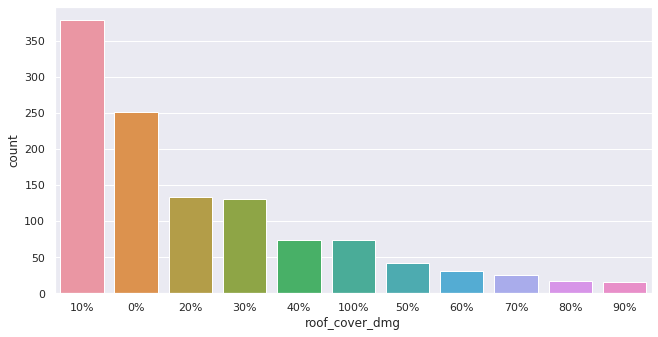

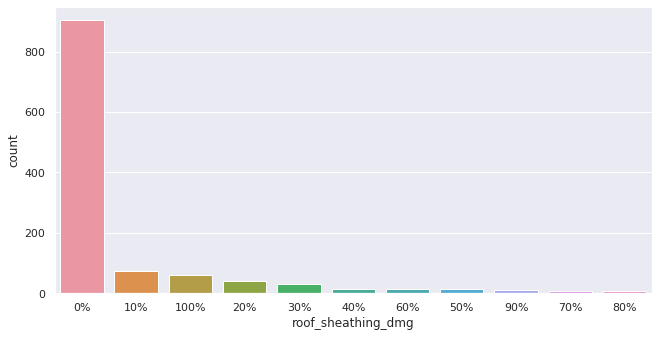

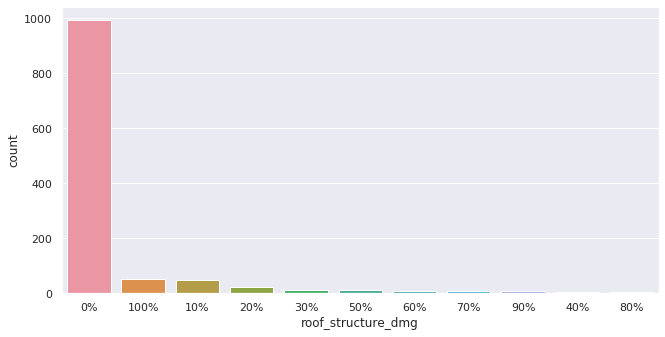

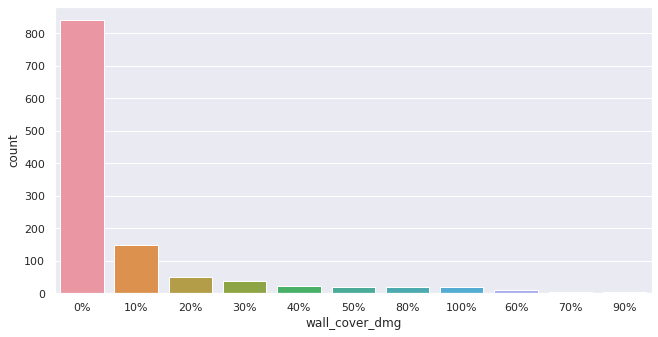

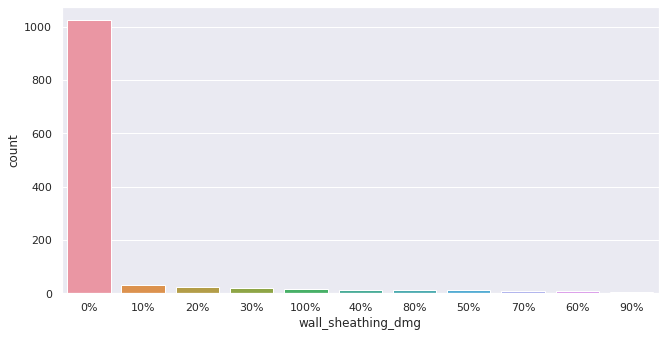

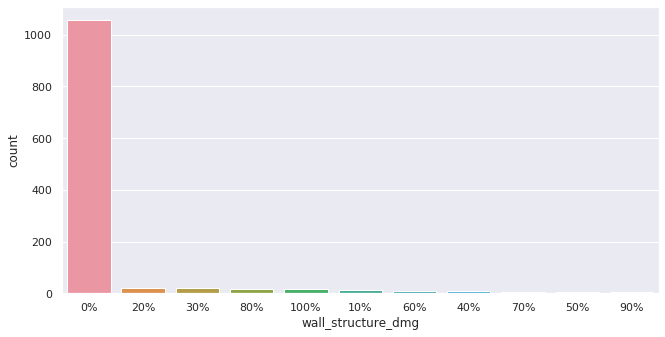

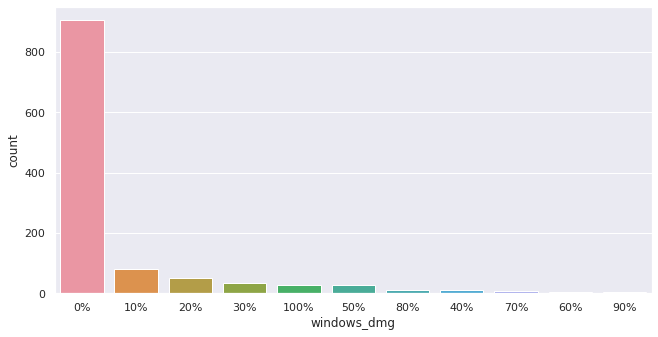

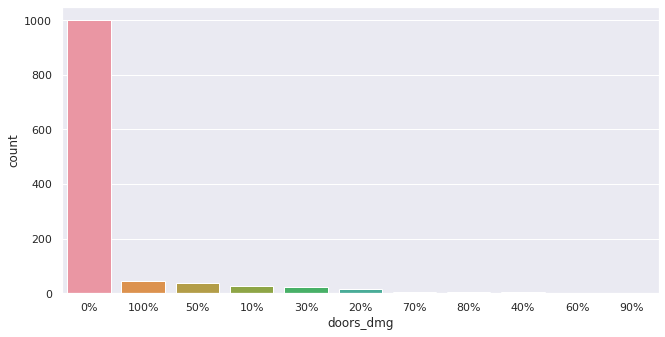

In [46]:
## Call a funtion - bettwer undersating , which type of demage caused more.
for column in ip_df.filter(regex='dmg').columns:
    vizDamage(column)

###### infernace
1. Roof cover damage - 10%  > 0%
2. all other damage (roof sheathing, roof structure, wall cover, wall sheathing, wall structure, window and door) 0% >>> 10%
3. 100% door damge is high compared to 10 % 20% 

##### further action
- More number of records are 0% (no damage), If I remove 0% from the *dmg* column, data will be more balanced. 

In [59]:
### defining same vizDamage - by using subset of actual dataframe. 
def vizDamage(colName):
    sns.set(rc={'figure.figsize':(10.7,5.27)})
    sns.countplot(x=colName, data=ip_df.loc[ip_df[colName]!='0%' ,] , order = ip_df.loc[ip_df[colName]!='0%' ,][colName].value_counts().index)
    plt.show()
#     sns.countplot(x="roof_cover_dmg", data=ip_df, order = ip_df['roof_cover_dmg'].value_counts().index)

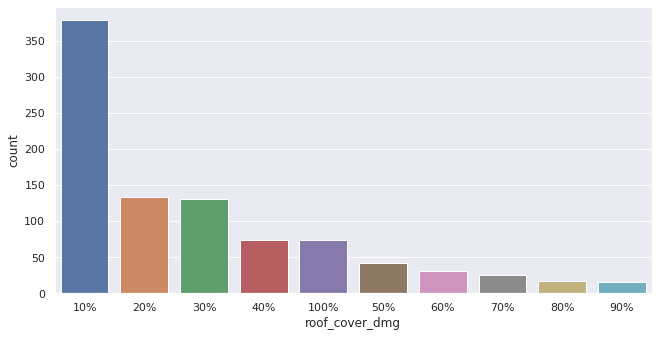

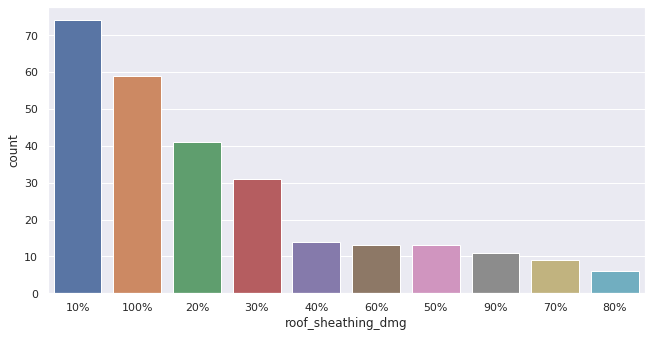

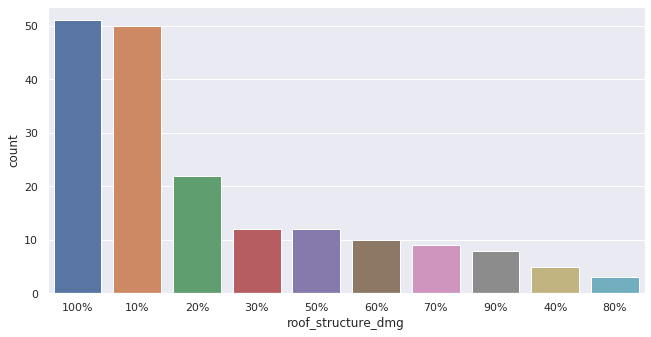

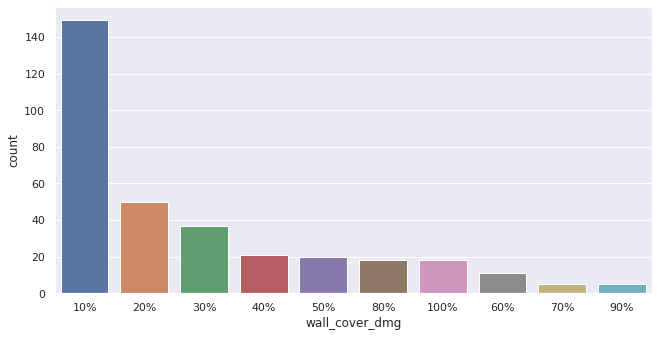

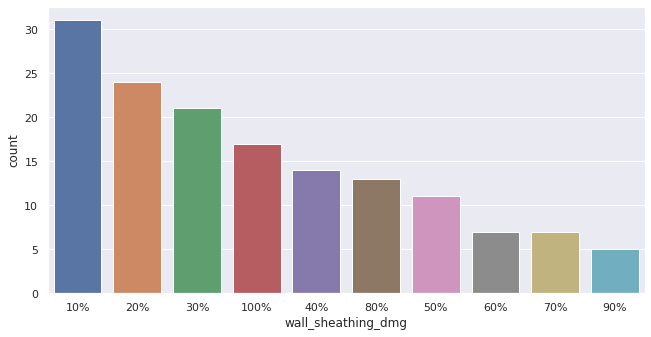

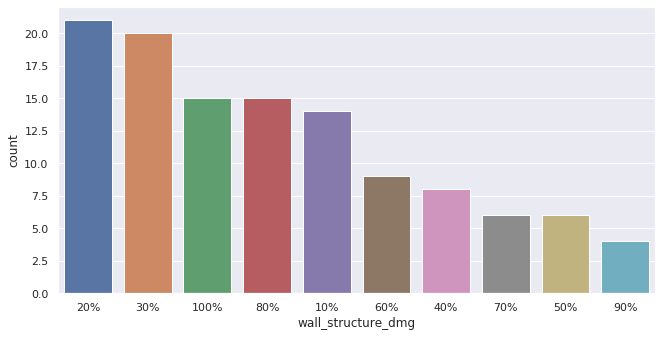

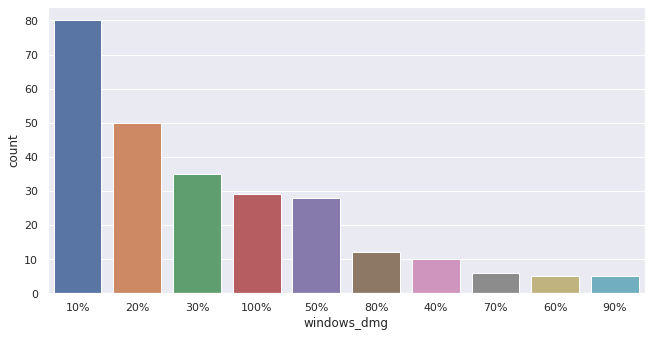

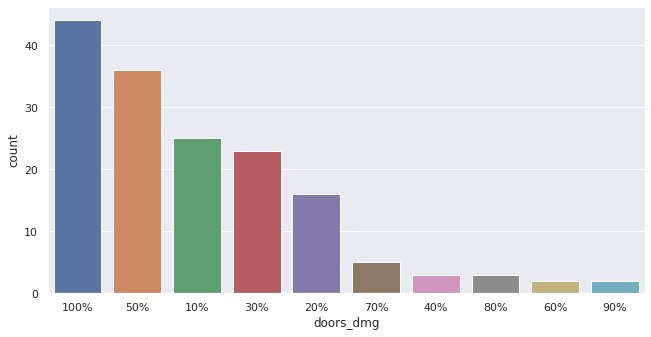

In [60]:
## Call a funtion - bettwer undersating , which type of demage caused more.

for column in ip_df.filter(regex='dmg').columns:
    vizDamage(column)

- Above diagram give better infernces, 
-  roof and door got heavily damaged as compared to wall and windows damage. 

###### which area and sub admin area got damaged heavily 
- when there is natural disaster, should identifed the most affected area.
- these area may be marked vulnerable, os that citizen will aware.

- by using the "building_address_admin_area" will help us to locate which area most affcted by hurricane harvey

In [67]:
print( "building address admin area")
ip_df.building_address_admin_area.value_counts()

print("--------------------------------------------")
print("\n\n  building address sub admin area")
ip_df.building_address_sub_admin_area.value_counts()

building address admin area


Texas    1177
Name: building_address_admin_area, dtype: int64

--------------------------------------------


  building address sub admin area


Aransas County         667
San Patricio County    265
Nueces County          126
Refugio County          71
Calhoun County          46
 Aransas County          1
Name: building_address_sub_admin_area, dtype: int64

######  Overall damage indicatore
- attributes "dod" - will gives damage condtion
    - 10 is most damage (Complete damage of building)
    - 1 is the least (minor damage)

In [10]:
print("Demage and number of observation")
ip_df.dod.value_counts()

Demage and number of observation


 4.0     360
 2.0     329
 0.0     193
 6.0      71
 1.0      65
 3.0      56
 7.0      36
 8.0      20
 9.0       6
 10.0      4
 5.0       4
-1.0       1
Name: dod, dtype: int64

[Text(0, 0.5, 'Number of observation'),
 Text(0.5, 0, 'Damage impact (dod)'),
 Text(0.5, 1.0, 'damage state and number of abservation in each damage state')]

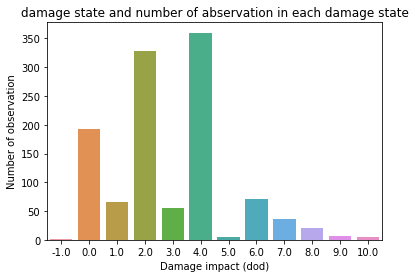

In [16]:
## Actual data - 
### damage state and number of abservation in each damage state 
ax = sns.countplot(x="dod", data=ip_df) 
ax.set(xlabel='Damage impact (dod)', ylabel='Number of observation', title= "damage state and number of abservation in each damage state")
plt.show()


##### NO DAMAGE INFORMATION

- it's important to distinguish the no damage and damage data.
- this will help to make better policy or identify the correct boundary points for making vulnerable location 

In [104]:
### NO DAMAGE INFORMATION

print("Total number of records : ",  ip_df.shape[0], " out of that ",  ip_df.loc[ip_df['dod'] == 0, ].filter(regex='dmg').count()[1], " are no damage")
print("\n")
print("Say example, few rows are listed below")
ip_df.loc[ip_df['dod'] == 0, ].filter(regex='dmg').head(3)

# print("-------------------------------------------------- \n ")
# print("Total number of records : ",  ip_df.shape[0], " out of that ",  ip_df.loc[ip_df['dod'] == -1, ].filter(regex='dmg').count()[1], " are no damage")

# print("\n")
# print("Say example, few rows are listed below")
# ip_df.loc[ip_df['dod'] == 10, ].filter(regex='dmg').head(3)




Total number of records :  1177  out of that  193  are no damage


Say example, few rows are listed below


,roof_cover_dmg,roof_sheathing_dmg,roof_structure_dmg,wall_cover_dmg,wall_sheathing_dmg,wall_structure_dmg,windows_dmg,doors_dmg
20,0%,0%,0%,0%,0%,0%,0%,0%
24,0%,0%,0%,0%,0%,0%,0%,0%
45,0%,0%,0%,0%,0%,0%,0%,0%


,roof_cover_dmg,roof_sheathing_dmg,roof_structure_dmg,wall_cover_dmg,wall_sheathing_dmg,wall_structure_dmg,windows_dmg,doors_dmg
321,100%,100%,100%,100%,100%,100%,100%,100%
753,100%,100%,100%,100%,100%,100%,100%,100%
773,100%,100%,100%,100%,100%,100%,100%,100%


 data is cleansed -  damage state and number of abservation in each damage state 


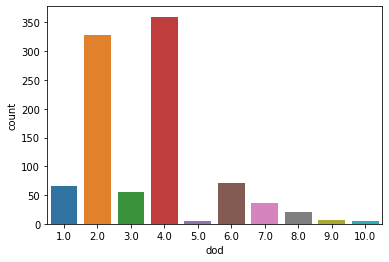

In [18]:
## damage 0 and -1 are rmoved from the actual data

print(" data is cleansed -  damage state and number of abservation in each damage state ")

sns.countplot(x="dod", data=ip_df.loc[ip_df['dod'] >0,]) 

######  Roof shape  vs Damage,

- Earlier we have seen roofs are got more damage compared to other parts of building. 
- by looking out what kind of roof_shape used in the building we can identify reason for heavy damage. 
- in future goverment can advise citizen to use better roof shape for durability. 

In [1]:
#### We have roof shape and damage indicatroe. 


In [103]:
print("Roof shapes are ..")
ip_df['roof_shape'].value_counts()

Roof shapes are ..


Gable          449
Hip            309
Hip/Gable      269
Complex         92
Flat            35
Other           12
Gable,Flat       4
Gable/Hip        1
Gable,Other      1
Name: roof_shape, dtype: int64

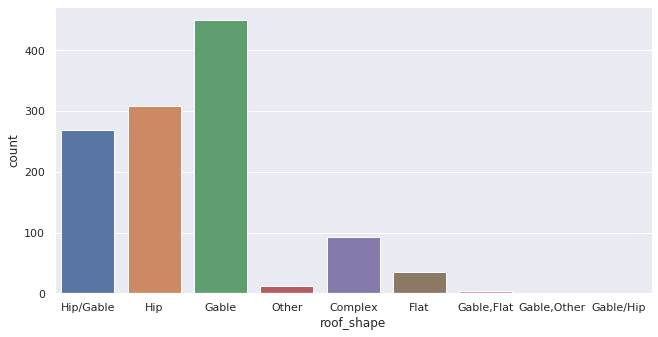

In [96]:
# ip_df.head(1)
# sns.barplot(y="Building Type",x='Damage State', data=ip_df)
sns.countplot(x="roof_shape", data=ip_df) 
# ip_df.describe()


###### Comparing roof shape level with high damage. 
- attribute "dod" will describe level of damage. 
    - filter out the moderate damage will help us to identify the reason 
    - I have extracted the "high level demage" from dod, the value is greater than 5 
    
    
- I have used extracted data to find the reason by relating with different attibutes

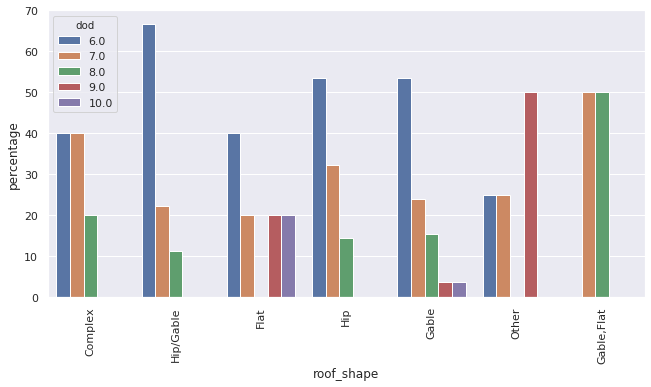

In [107]:
occupation_counts = (ip_df.loc[ip_df['dod']>5 ,].groupby(['roof_shape'])['dod']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('dod'))
# occupation_counts
p = sns.barplot(x="roof_shape", y="percentage",hue='dod', data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels


###### roof_cover vs heavy damage 

- same inference applied for roof cover.

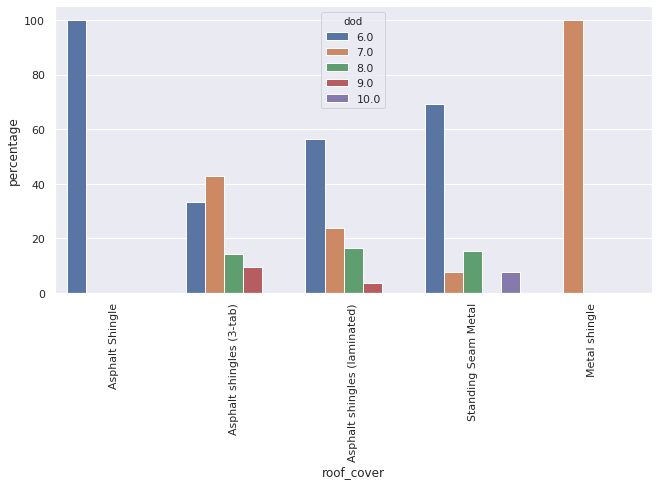

In [113]:
# ip_df.head(1)
# sns.barplot(y="Building Type",x='Damage State', data=ip_df)
# sns.countplot(x="roof_cover", hue="dod", data=ip_df) 
# ip_df.describe()


occupation_counts = (ip_df.loc[ip_df['dod']>5 ,].groupby(['roof_cover'])['dod']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('dod'))
# occupation_counts
p = sns.barplot(x="roof_cover", y="percentage",hue='dod', data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels


###### Number of stories buildings

- is the damage due to height of the building.  

1.0     873
2.0     258
3.0      14
1.5       3
9.0       2
11.0      1
4.0       1
8.0       1
12.0      1
Name: number_of_stories, dtype: int64

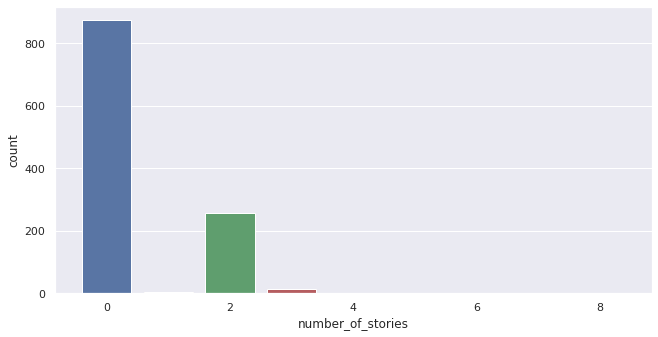

In [120]:
ip_df['number_of_stories'].value_counts()
g = sns.countplot(x="number_of_stories", data=ip_df)
g.set_xscale("linear")

In [2]:
# ip_df.head()

###### Impact of first_floor_elevation for the Damage

- just trying to identify the mean value for each high Damage State.

- higher mean value of first_floor_elevation, will cause moderate damage, 
- there is not much difference in less and heavy damage, structural component values.

Damage State and Mean Value


dod
-1.0     12.000000
 0.0      0.461658
 1.0      0.675385
 2.0      2.125405
 3.0      3.034464
 4.0      2.758333
 5.0      0.500000
 6.0      5.402817
 7.0      3.982857
 8.0      6.100000
 9.0      8.000000
 10.0     1.750000
Name: first_floor_elevation, dtype: float64

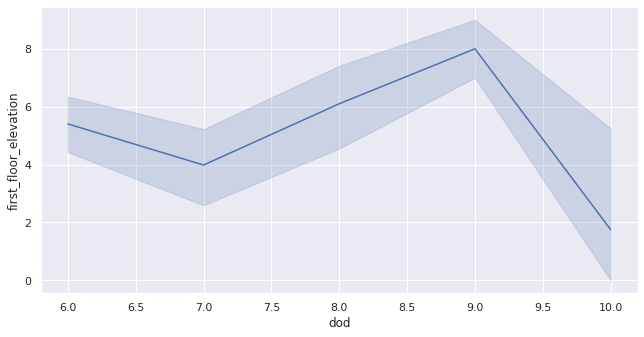

In [118]:
print("Damage State and Mean Value")
ip_df.groupby(['dod'])['first_floor_elevation'].mean()
g = sns.lineplot(x = 'dod',y = 'first_floor_elevation', data=ip_df.loc[ip_df['dod']>5  ,])
g.set_xscale('linear')

In [3]:
# ip_df.head(3)

##### Map view 
- "latitude" and "longitude" attributes are used to locate the place.
- this map view show the low level damage area.
- light damage places
    - damage state betwee 1 to 5

In [155]:
# !pip install folium
import folium

##set inital cordinates

SF_COORDINATES = (28.743594, -97.417562)
# 35.2010° N, 91.8318


# # create empty map zoomed in on Florida
hurricane_map = folium.Map(location=[SF_COORDINATES[0], SF_COORDINATES[1]], zoom_start=8.2)

## Create a color marker
colordict = {1: 'green', 2: 'light green', 3: 'pink', 4: 'blue', 5:'yellow', 0:'gold'}

### add a marker for every record in the filtered data, use a clustered view
for lat, lon, damage_scale in zip(ip_df.loc[(ip_df['dod']>=0) & ( ip_df['dod']<=5) ,]['latitude'], ip_df.loc[(ip_df['dod'] >=0) & (ip_df['dod']<=5),]['longitude'], ip_df.loc[(ip_df['dod'] >=0) & (ip_df['dod']<=5) ,]['dod']):
#     print(damage_scale)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup = ('empty'),
        color='b',
        key_on = damage_scale,
        threshold_scale=[0,1,2,3,4,5],
        fill_color=colordict[int(damage_scale)],
        fill=True,
        fill_opacity=0.7
        ).add_to(hurricane_map)

### Display the map
display(hurricane_map);


### Map clearly shows that, Building near by sea has more demage then others. 

##### map view to locate the heavy damage area
- Heavy damage places
- damage state betwee 6 to 10

In [158]:
# !pip install folium
import folium

##set inital cordinates

SF_COORDINATES = (28.743594, -97.417562)
# 35.2010° N, 91.8318


# # create empty map zoomed in on Florida
hurricane_map = folium.Map(location=[SF_COORDINATES[0], SF_COORDINATES[1]], zoom_start=8.2)

## Create a color marker
colordict = {6: 'indigo', 7: 'orange', 8: 'red', 9: 'darkred', 10:'darkred'}

### add a marker for every record in the filtered data, use a clustered view
for lat, lon, damage_scale in zip(ip_df.loc[ip_df['dod']>5 ,]['latitude'], ip_df.loc[ip_df['dod'] > 5 ,]['longitude'], ip_df.loc[ip_df['dod'] >5 ,]['dod']):
#     print(damage_scale)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup = ('empty'),
        color='b',
        key_on = damage_scale,
        threshold_scale=[0,1,2,3,4,5],
        fill_color=colordict[int(damage_scale)],
        fill=True,
        fill_opacity=0.7
        ).add_to(hurricane_map)

### Display the map
display(hurricane_map);


### Map clearly shows that, Building near by sea has more demage then others. 

### comparing hurricane michael and hurricane harvey 
- in both hurricane michael and hurricane harvey
    - Roofs got damaged compared to other parts of buildings
    - More number of damage due to Gable roof 
 
- Below find the hurricane michael - roofs 
 
 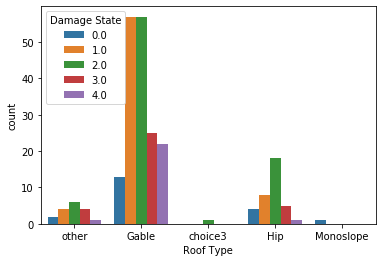

-  hurricane harvey - roofs level
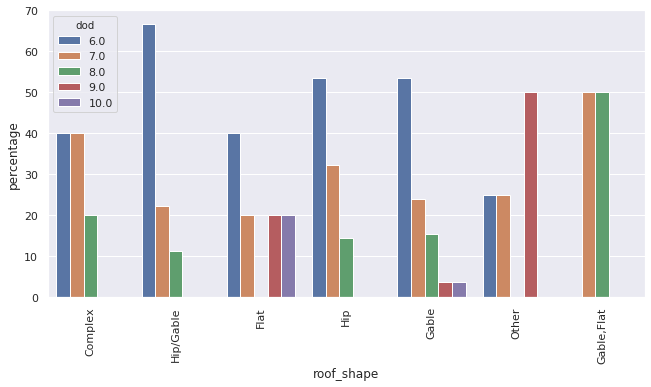